In [60]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import warnings
warnings.filterwarnings('ignore')

Data Preparation



In [61]:
Moviedata = pd.read_csv('Final-CLEAN-Dataset.csv')
Moviedata.head()

,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,1,Inception,2010s,12,13+,8.8,87,1,Action,United States,English,148
1,2,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
2,3,Avengers: Infinity War,2010s,4,13+,8.5,84,1,Action,United States,English,149
3,4,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
4,5,"The Good, the Bad and the Ugly",1960s,56,18+,8.8,97,2,Western,Italy,Italian,161


Summary Statistics for Age Category in General

In [92]:
X = Moviedata[['Rotten','Runtime', 'Age of Movie', 'Age Category', 'Genres', 'Country', 'Language']]
Y = Moviedata['IMDb']

X = pd.get_dummies(data=X, drop_first=True)

In [93]:
X.head()

,Rotten,Runtime,Age of Movie,Age Category_16+,Age Category_18+,Age Category_7+,Age Category_all,Genres_Adventure,Genres_Animation,Genres_Biography,...,Language_Swedish,Language_Tagalog,Language_Tamil,Language_Telugu,Language_Thai,Language_Turkish,Language_Urdu,Language_Vietnamese,Language_Wolof,Language_Yiddish
0,87,148,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,87,136,23,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,84,149,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,96,116,37,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,97,161,56,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4444, 165)
(1112, 165)
(4444,)
(1112,)


In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [96]:
# print the intercept
print(model.intercept_)

1.4064853242422766


In [97]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Rotten,0.024089
Runtime,0.007742
Age of Movie,0.009780
Age Category_16+,-0.355685
Age Category_18+,-0.117511
...,...
Language_Turkish,1.417112
Language_Urdu,3.021511
Language_Vietnamese,2.783805
Language_Wolof,0.000000


In [98]:
predictions = model.predict(X_test)
predictions

array([6.05805373, 6.35599565, 7.32131374, ..., 5.69221035, 6.39564732,
       7.24571431])

<AxesSubplot:xlabel='IMDb'>

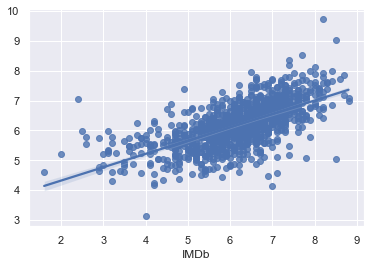

In [99]:
sb.regplot(y_test,predictions)

In [82]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                   IMDb   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     400.1
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:31:04   Log-Likelihood:                -5549.2
No. Observations:                4444   AIC:                         1.111e+04
Df Residuals:                    4436   BIC:                         1.117e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.9585      0.075  

In [71]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -0.045157527065146974


ValueError: Found input variables with inconsistent numbers of samples: [4444, 4167]